In [33]:
import sys
import numpy as np
import matplotlib
import pandas as pd
import sklearn
print('python:{}'.format(sys.version))
print('numpy:{}'.format(np.__version__))
print('matplotlib:{}'.format(matplotlib.__version__))
print('pandas:{}'.format(pd.__version__))
print('sklearn:{}'.format(sklearn.__version__))


python:3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy:1.15.4
matplotlib:3.0.2
pandas:0.23.4
sklearn:0.20.1


In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression

In [35]:
data = pd.read_csv('Breast_Cancer.csv')

In [36]:
df = pd.DataFrame(data)

In [37]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [38]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [39]:
df.shape

(569, 33)

In [40]:
df.drop(['id'],1,inplace = True)

In [41]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [42]:
df.loc[0]

diagnosis                         M
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                      1001
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                     2019
smoothness_worst             0.1622
compactness_worst            0.6656
concavity_worst             

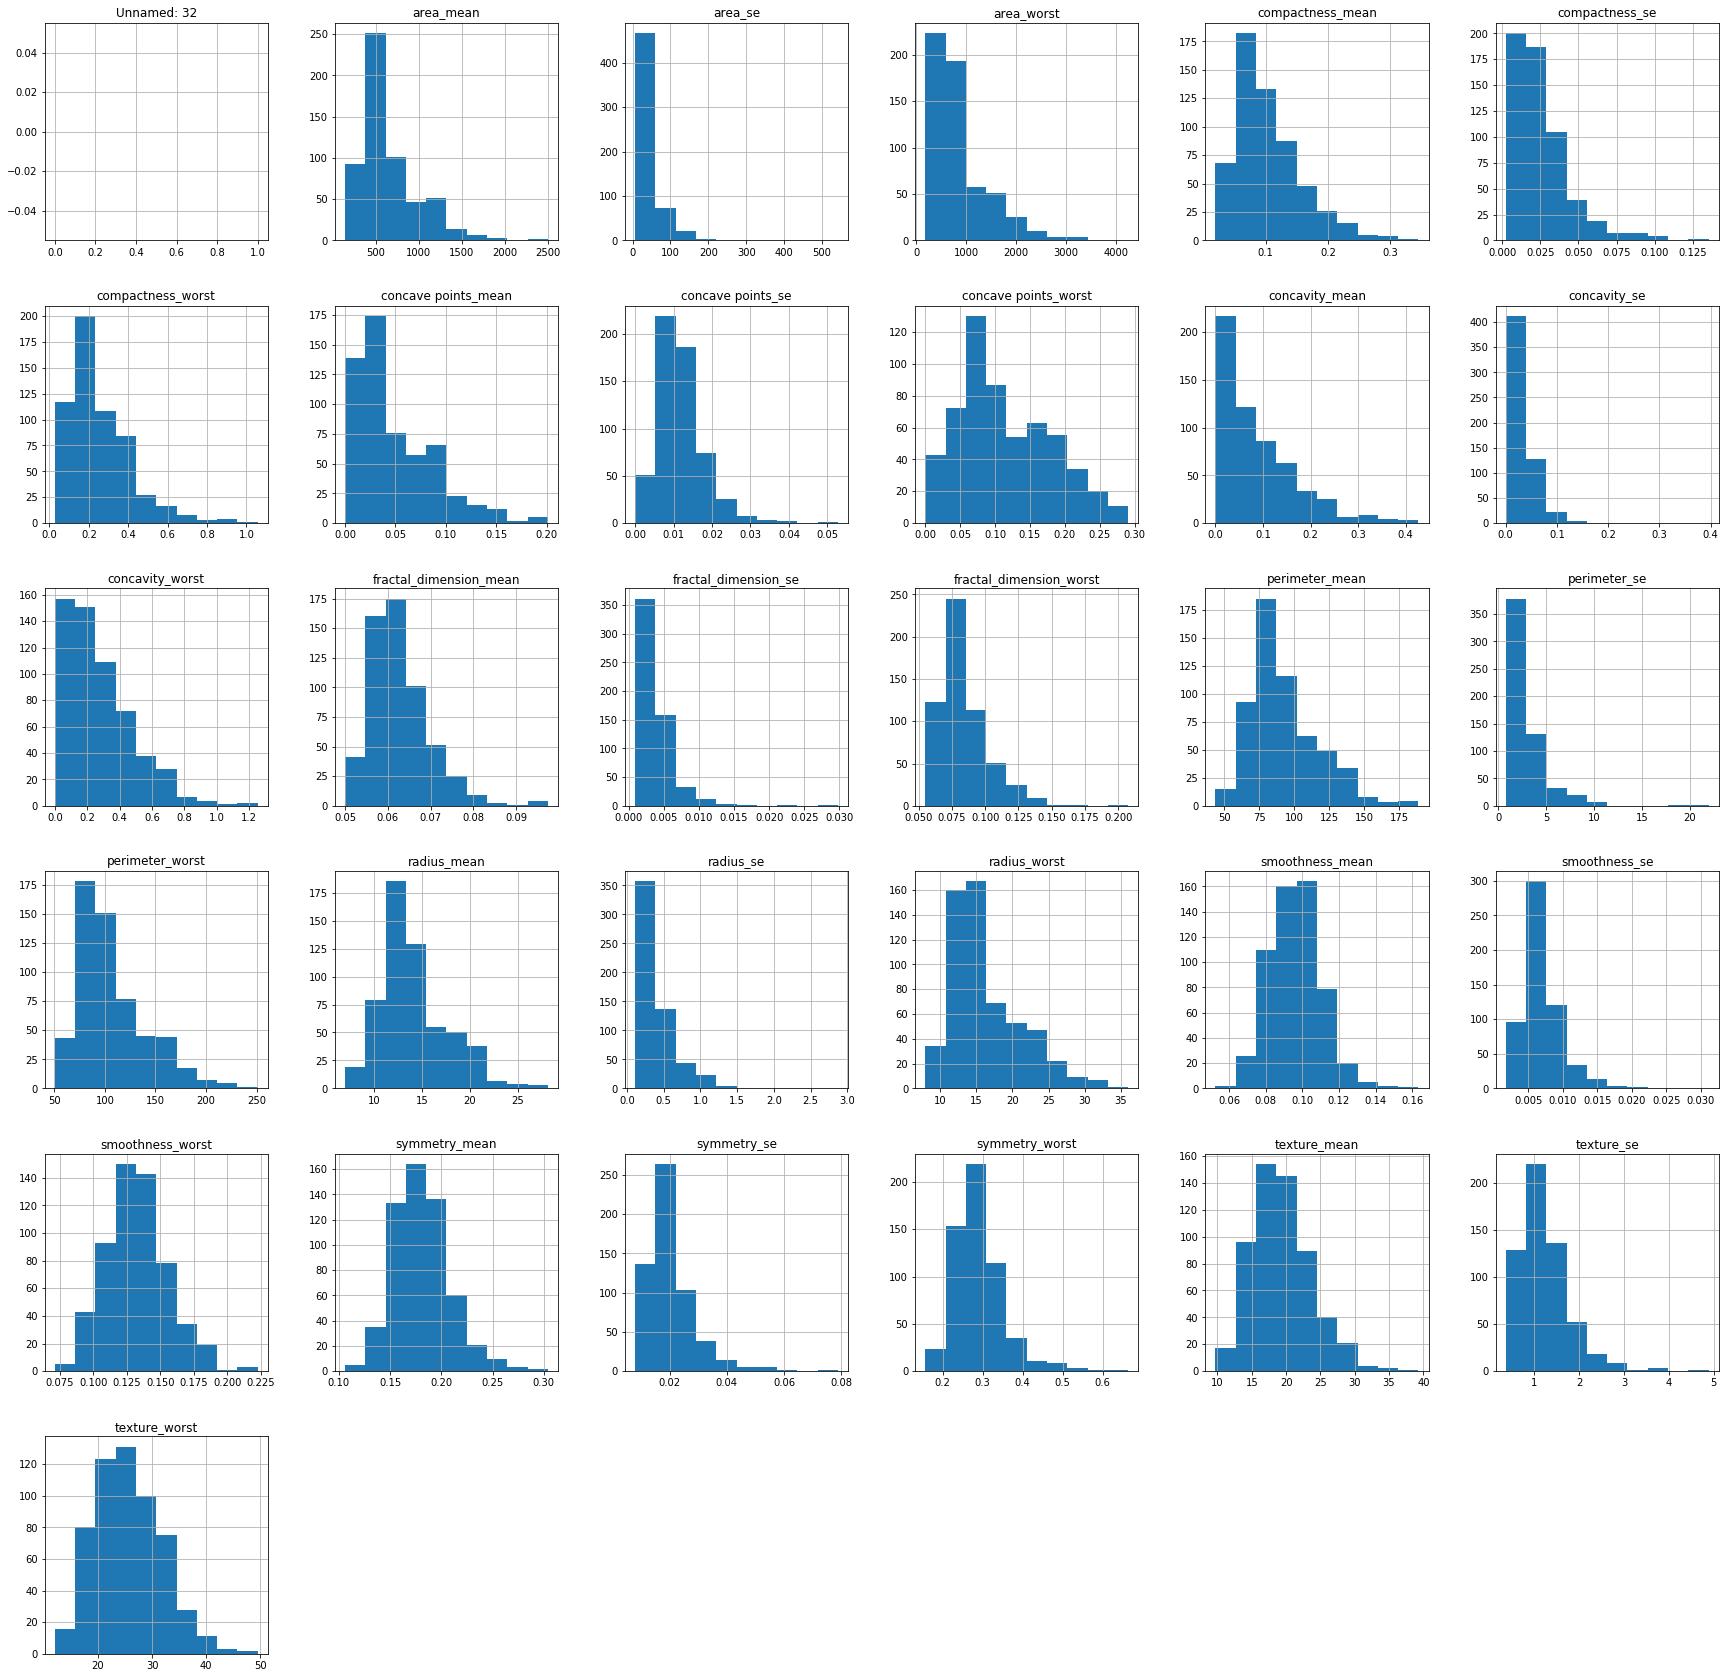

In [43]:
df.hist(figsize =(30,30))
plt.show()

In [99]:
x = df.iloc[:,1:29]
y = df.iloc[:,0]
y.shape

(569,)

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [101]:
seed = 10
scoring = 'accuracy'



In [102]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC(gamma ='auto',kernel = 'linear')))
models.append(('Logistic',LogisticRegression(solver = 'liblinear',random_state = 0)))
results = []
names = []
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for name,model in models:
    kfold = KFold(n_splits = 10,random_state = seed)
    cv_results = cross_val_score(model,x_train,y_train,cv = kfold,scoring =scoring)
    names.append(name)
    results.append(cv_results)
    print (name,cv_results.mean(),cv_results.std())
 
    


KNN 0.9221153846153847 0.03621341019895807
SVM 0.9423076923076923 0.038734077129808586
Logistic 0.9423076923076923 0.038734077129808586


In [103]:
for name,model in models:
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9473684210526315
              precision    recall  f1-score   support

           B       0.96      0.95      0.96       108
           M       0.92      0.94      0.93        63

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

SVM
0.9532163742690059
              precision    recall  f1-score   support

           B       0.97      0.95      0.96       108
           M       0.92      0.95      0.94        63

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Logistic
0.9590643274853801
              precision    recall  f1-score   support

           B       0.99      0.94      0.97       108
           M       0.91      0.98      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.95      0.96      0.96       171


In [105]:
models[2][1].predict(x_test)

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

In [106]:
from sklearn.decomposition import PCA
pc = PCA(n_components = None)
x_tn = pc.fit_transform(x_train)
x_tt = pc.transform(x_test)
ex = pc.explained_variance_ratio_
ex

array([9.81221166e-01, 1.68180581e-02, 1.76298792e-03, 1.04374374e-04,
       8.23285738e-05, 6.14907804e-06, 3.67239547e-06, 6.93381055e-07,
       3.09298318e-07, 1.72977393e-07, 6.37857355e-08, 1.23457103e-08,
       5.64658498e-09, 2.63210825e-09, 1.30942387e-09, 8.27762017e-10,
       7.20697417e-10, 4.61856836e-10, 3.02548984e-10, 1.47915853e-10,
       7.78780660e-11, 5.78285941e-11, 5.40824532e-11, 2.77910412e-11,
       1.49232318e-11, 5.84618143e-12, 3.38591435e-12, 1.73824045e-12])

In [107]:
from sklearn.decomposition import PCA
pc = PCA(n_components = 3)
x_tn = pc.fit_transform(x_train)
x_tt = pc.transform(x_test)
ex = pc.explained_variance_ratio_
ex

array([0.98122117, 0.01681806, 0.00176299])

In [108]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC(gamma ='auto',kernel = 'linear')))
models.append(('Logistic',LogisticRegression(solver = 'liblinear',random_state = 0)))
results = []
names = []
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for name,model in models:
    kfold = KFold(n_splits = 10,random_state = seed)
    cv_results = cross_val_score(model,x_tn,y_train,cv = kfold,scoring =scoring)
    names.append(name)
    results.append(cv_results)
    print (name,cv_results.mean(),cv_results.std())
 
    


KNN 0.9171153846153848 0.03718285793738624
SVM 0.9220512820512822 0.03815282084368134
Logistic 0.9195512820512821 0.03704246412681606


In [109]:
for name,model in models:
    model.fit(x_tn,y_train)
    predictions = model.predict(x_tt)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9415204678362573
              precision    recall  f1-score   support

           B       0.95      0.95      0.95       108
           M       0.92      0.92      0.92        63

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

SVM
0.9415204678362573
              precision    recall  f1-score   support

           B       0.95      0.95      0.95       108
           M       0.92      0.92      0.92        63

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Logistic
0.9473684210526315
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.90      0.93        63

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
